In [16]:
import pandas as pd 
from sklearn import datasets
import matplotlib.pyplot as plt
from ConvexHull_v2 import ConvexHull_v2


print("Selamat datang di Uji Coba Convex Hull v.2.0.1")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Terdapat beberapa pilihan visualisasi :")
print("    1. Sepal Width (y) vs Sepal Length (x)    :: IRIS-Datasets")
print("    2. Petal Width (y) vs Petal Length (x)    :: IRIS-Datasets")
print("    3. Color Intensity (y) vs Alcohol % (x)   :: WINE-Datasets")
print("    4. Flavanoids (y) vs Total Phenols % (x)  :: WINE-Datasets")


pil = int(input("Silahkan masukkan pilihan: "))
if (pil==1 or pil==2):
    data = datasets.load_iris()
    if pil==1:
        title = 'Sepal Width vs Sepal Length'
        col1 = 0
        col2 = 1
    elif pil==2:
        title = 'Petal Width vs Petal Length' 
        col1 = 2
        col2 = 3
elif (pil==3 or pil==4):
    data = datasets.load_wine()
    if pil==3:
        title = 'Alcohol vs Color Intensity'
        col1 = 0
        col2 = 9
    elif pil==4:
        title = 'Total Phenols vs Flavanoids' 
        col1 = 5
        col2 = 6
#create a DataFrame 
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)

print()
print("Berikut Contoh Data yang Diolah :")
df.head()

Selamat datang di Uji Coba Convex Hull v.2.0.1
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Terdapat beberapa pilihan visualisasi :
    1. Sepal Width (y) vs Sepal Length (x)    :: IRIS-Datasets
    2. Petal Width (y) vs Petal Length (x)    :: IRIS-Datasets
    3. Color Intensity (y) vs Alcohol % (x)   :: WINE-Datasets
    4. Flavanoids (y) vs Total Phenols % (x)  :: WINE-Datasets

Berikut Contoh Data yang Diolah :


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


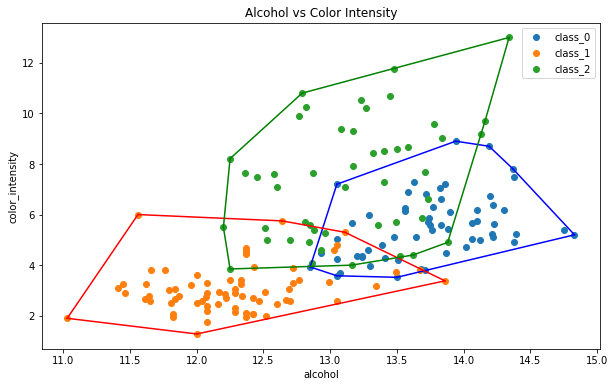

In [17]:
colors = ['b','r','g']
plt.figure(figsize = (10, 6))
plt.title(title)
plt.xlabel(data.feature_names[col1])
plt.ylabel(data.feature_names[col2])

for i in range(len(data.target_names)):
    each = df[df['Target'] == i]              # untuk mengambil data dengan target yang seragam
    bucket = each.iloc[:,[col1,col2]].values        # untuk mendapatkan aray berupa posisi x dan y, berukuran n x 2, n adalah banyak data
    hull = ConvexHull_v2(bucket)                   # bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()